# Tricks with Boolean Series

This notebook discusses Boolean series, and various useful things you can do with them.

First let's import our libraries:

In [1]:
import pandas as pd
import numpy as np

In [2]:
rng = np.random.default_rng(20201103)

## Computing Probability

If we have a logical series:

In [4]:
xb = pd.Series([True, False, True, True, True, False, False, True, False, True])
xb

0     True
1    False
2     True
3     True
4     True
5    False
6    False
7     True
8    False
9     True
dtype: bool

We can **count** the number of `True` values with `sum`:

In [5]:
xb.sum()

6

We can count the **fraction** of `True` values, or the probability of `True`, with `mean()`:

In [6]:
xb.mean()

0.6

The NumPy equivalents also work:

In [7]:
np.mean(xb)

0.6

## Creating with Logical Operations

If you do a logical operation (`==`, `<`, `>`, `<=`, or `>=`) on a series, comparing it to either a fixed value or another series, you will get a Boolean series.

This is very useful for creating the outcome vector for a logistic regression, as the boolean series will be treated as 1 (`True`) and 0 (`False`), and can be predicted with either StatsModels or SciKit-Learn's logistic regression or other classifier.

For example, if we draw some random numbers:

In [8]:
xs = pd.Series(rng.random(size=1000))
xs

0      0.163352
1      0.333021
2      0.054169
3      0.662442
4      0.517284
         ...   
995    0.882045
996    0.897472
997    0.161948
998    0.850922
999    0.222618
Length: 1000, dtype: float64

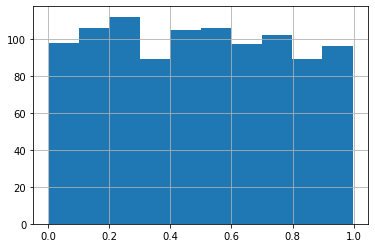

In [20]:
xs.hist()

In [12]:
xs.describe()

count    1000.000000
mean        0.491382
std         0.285871
min         0.000805
25%         0.235146
50%         0.489305
75%         0.737922
max         0.997661
dtype: float64

We can get a series that is `True` when the number is at least 0.8:

In [10]:
xs_ge = xs >= 0.8
xs_ge

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997    False
998     True
999    False
Length: 1000, dtype: bool

We can verify that values start at 0.8:

In [11]:
xs[xs_ge].min()

0.8050954039782324

Since the values are drawn uniformly in the range $[0,1)$, then approximately 20% of the values should be at least 0.8 ($P(X \ge 0.8) = 0.2$).  Let's check:

In [13]:
xs_ge.mean()

0.183

## Logical Operations

The bitwise negation operator, `~`, negates a boolean series:

In [14]:
~xb

0    False
1     True
2    False
3    False
4    False
5     True
6     True
7    False
8     True
9    False
dtype: bool

The `np.logical_not` function also does:

In [16]:
np.logical_not(xb)

0    False
1     True
2    False
3    False
4    False
5     True
6     True
7    False
8     True
9    False
dtype: bool

We can combine them with bitwise and (`&`) or or (`|`).

Let's find all the values between 0.8 and 0.9:

In [17]:
xs_in_range = xs_ge & (xs < 0.9)
xs[xs_in_range].describe()

count    87.000000
mean      0.849424
std       0.028517
min       0.805095
25%       0.826880
50%       0.845260
75%       0.878704
max       0.897472
dtype: float64

We can find everything *except* $[0.2,0.8)$:

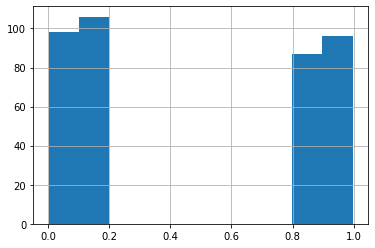

In [19]:
xs_lohi = xs_ge | (xs < 0.2)
xs[xs_lohi].hist()

Look, we cut out the middle!